# TEM Tango Control — Client Tutorial

This notebook demonstrates how to connect to and interact with the TEM Tango devices.

**Prerequisites**: All device servers must be running before executing this notebook.
```
python src/detectors/HAADF.py test haadf_server
python src/Microscope.py test microscope_server
```

## 1. Connect to devices

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tango

# --nodb mode — use full tango:// URL with port and #dbase=no suffix
haadf_proxy = tango.DeviceProxy("tango://127.0.0.1:8888/test/nodb/haadf#dbase=no")
microscope_proxy = tango.DeviceProxy("tango://127.0.0.1:8889/test/nodb/microscope#dbase=no")



In [2]:
print('HAADF state     :', haadf_proxy.state())
print('Microscope state:', microscope_proxy.state())

HAADF state     : ON
Microscope state: ON


## 2. Inspect device attributes and commands

In [3]:
print('--- HAADF attributes ---')
for attr in haadf_proxy.get_attribute_list():
    print(f'  {attr}')

print('\n--- Microscope commands ---')
for cmd in microscope_proxy.get_command_list():
    print(f'  {cmd}')

--- HAADF attributes ---
  dwell_time
  image_width
  image_height
  State
  Status

--- Microscope commands ---
  Connect
  Disconnect
  Init
  State
  Status
  get_image


## 3. Configure HAADF detector settings

In [4]:
haadf_proxy.dwell_time 

1e-06

In [5]:
haadf_proxy.dwell_time   = 1e-6   # 1 µs
haadf_proxy.image_width  = 1024
haadf_proxy.image_height = 1024

print('dwell_time  :', haadf_proxy.dwell_time)
print('image_width :', haadf_proxy.image_width)
print('image_height:', haadf_proxy.image_height)

dwell_time  : 1e-06
image_width : 1024
image_height: 1024


## 4. Acquire a HAADF image

In [6]:
# get_image returns DevEncoded = (json_metadata_str, raw_bytes)
json_meta, raw_bytes = microscope_proxy.get_image('haadf')

meta  = json.loads(json_meta)
image = np.frombuffer(raw_bytes, dtype=meta['dtype']).reshape(meta['shape'])

print('Metadata:', json.dumps(meta, indent=2))
print('Image shape:', image.shape)
print('Image dtype:', image.dtype)

Metadata: {
  "detector": "haadf",
  "shape": [
    1024,
    1024
  ],
  "dtype": "uint16",
  "dwell_time": 1e-06,
  "timestamp": 1771638445.7623942
}
Image shape: (1024, 1024)
Image dtype: uint16


## 5. Display the image

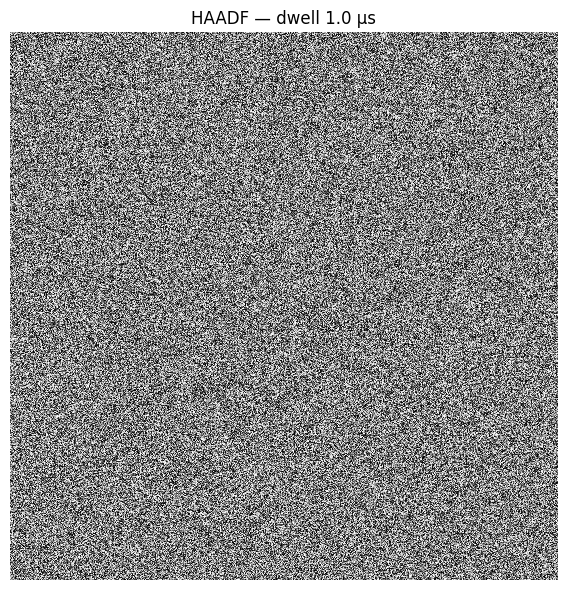

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray', interpolation='none')
ax.set_title(f"HAADF — dwell {meta['dwell_time']*1e6:.1f} µs")
ax.axis('off')
plt.tight_layout()
plt.show()

## 6. Advanced acquisition (multi-detector)

> **Not yet implemented.** See `src/acquisition/advanced_acquisition.py` for design notes.